R-5.4 在代码段5-3给出的DynamicArray类中，$__getitem__$ 方法不支持索引为负。更新该方法，使得其更符合Python列表语义。

In [ ]:
import ctypes     # provides low-level arrays

class DynamicArray:
    """A dynamic array class to a simplified Python list."""
    
    def __init__(self):
        """Create an empty array."""
        self._n = 0                                   # count actual elements
        self._capacity = 1                            # default array capacity
        self._A = self._make_array(self._capacity)    # low-level array
    
    def __len__(self):
        """Return number of elements stored in the array."""
        return self._n
    
    def __getitem__(self, k):
        """Return element at index k."""
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]                             # retrieve from array
    
    def __getitem__(self, k):
        '''
        我的答案
        '''
        if not -self._n <= k < self._n:
            raise IndexError('invalid index')
        if -self._n <= k < 0:
            return self._A[self._n + k]
        else:
            return self._A[k]
    
    def __getitem__(self, k):
        '''参考答案'''
        if k < 0:
            k += self._n    # adjust for negative index
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]                             # retrieve from array
    
    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:                 # not enough room
            self._resize(2 * self._capacity)          # so double capacity
        self._A[self._n] = obj
        self._n += 1
    
    def _resize(self, c):                             # nonpublic utitity
        """Resize internal array to capacity c."""
        B = self._make_array(c)                       # new bigger array
        for k in range(self._n):                      # for each existing value
            B[k] = self._A[k]
        self._A = B                                   # use the bigger array
        self._capacity = c
    
    def _make_array(self, c):                         # nonpublic utitity
        """Return new array with capacity c."""
        return (c*ctypes.py_object)()                 # see ctypes documention

R-5.6 在代码段5-5中实现了DynamicArray类的insert方法，但是效率较低。当改变数组大小时，改变操作需要花费时间把所有元素从旧数组复制到新数组，在随后的插入过程中，需要循环移动其中许多元素。对insert元素进行改进，使得在改变数组大小时，插入操作能将所有元素直接移动到其最终位置，以免循环移动。

In [ ]:
# 这里范了个错误，插入是针对self._A进行插入，而不是针对B进行插入
def insert(self, k, value):
    if self._n == self._capacity:
        B = self._make_array(2*self._capacity)
        if 0 <= k < self._n:
            for i in range(0, k):
                B[i] = self._A[i]
            B[k] = value
            for j in range(k, self._n):
                B[j+1] = self._A[j]
        if k <= self._n < 2 * self._n:
            for i in range(0, self._n):
                B[i] = self._A[i]
            B[k] = value
        self._capacity = 2 * self._n    # 更改容量
        self._A = B
    else:
        for j in range(self._n, k, -1):
            self.A[j] = self._A[j-1]
        self._A[k] = value
    self._n += 1

In [ ]:
# 修改后
def insert(self, k, value):
    if self._n == self._capacity:
        B = self._make_array(2*self._capacity)
        for i in range(0, k):
            B[i] = self._A[i]
        B[k] = value
        for j in range(k, self._n):
            B[j+1] = self._A[j]
        self._capacity = 2 * self._capacity    # 更新容量
        self._A = B                            # 更新self._A
    else:
        for j in range(self._n, k, -1):
            self.A[j] = self._A[j-1]
        self._A[k] = value
    self._n += 1

In [ ]:
# 参考答案
def insert(self, k, value):
    if self._n == self._capacity:                 # not enough room
        B = self._make_array(2*self._capacity)    # new (bigger) array
        for j in range(k):
            B[j] = self._A[j]
        B[k] = value
        for j in range(k, self._capacity):
            B[j+1] = self._A[j]
        self._capacity = 2 * self._capacity
        self._A = B
    else:
        for j in range(self._n, k, -1):           # shift rightmost first
            self.A[j] = self._A[j-1]
        self._A[k] = value                        # store newest element
    self._n += 1

R-5.7 设A为数组，其大小$n\geq 2$，包含1~n-1的整数，其中恰有一个整数重复。描述一种快速算法，找到A中这个重复的整数。

In [1]:
def missing(data):
    found = [False] * len(data)
    for val in data:
        if found(val):
            return val
        else:
            found[val] = True

R-5.11 使用标准控制结构计算$n\times n$数据集中所有编号的和，该数据集用列表的列表来表示。

In [2]:
def my_sum(data):
    total = 0
    for i in range(len(data)):
        total += sum(data[i][:])
    return total

In [3]:
c = 5
r = 5
data = [[i for i in range(c)] for j in range(r)]
print(data)
print(len(data))
print(len(data[0]))

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]
5
5


In [4]:
result = my_sum(data)
print(result)

50


c-5.14 使用random模块提供的shuffle方法，对一张python列表重新排序，使得每种可能的顺序出现的概率相等。请实现这样的函数，可以使用random模块提供的randrange(n)函数，该函数返回0~n-1的随机数字。

In [ ]:
# random.shuffle
import random
import numpy as np

data = np.random.randint(0, 10, size=(10))
print(data)
random.shuffle(data)
print(data)

In [ ]:
# random.randrange
# random.randrange不包括右边界
for i in range(10):
    rand = random.randrange(len(data))
    print(rand, end=' ')

In [ ]:
import random
def my_shuffle(data):
    index = [i for i in range(len(data))]
    new_data = []
    while len(index) > 0:
        rand = random.randrange(len(data))
        if rand in index:
            new_data.append(data[rand])
            index.remove(rand)
    return new_data

In [ ]:
import numpy as np
data = np.random.randint(0, 10, size=(10))
print(data)
new_data = my_shuffle(data)
print(new_data)

C-5.16 对代码段5-3给出的DynamicArray类，实现其pop方法，删除其数组的最后一个元素，每当元素个数小于N/4时，将数组大小缩小为原来的一半（N为数组大小）。

In [ ]:
def pop(self):
    self._A[self._n] = None
    self._n -= 1
    if self._n < self._capacity // 4:
        B = self._make_array(self._capacity // 2)
        for i in range(self._n):
            B[i] = self._A[i]
        self._A = B
        self._capacity == self._capacity // 2

In [5]:
# update 2021-1-28 14:51
def pop(self):
    self._A[self._n-1] = None
    self._n -= 1
    if self._n < self._capacity // 4:
        B = self._make_array(self._capacity // 2)
        for i in range(self._n):
            B[i] = self._A[i]
        self._A = B
        self._capacity == self._capacity // 2

C-5.21 在5.4.2节中，我们给出4种不同的方法组成长字符串：①重复连接；②增加一张临时列表，之后合并到该临时列表中；③使用join的列表推导式；④使用join生成器理解法。做实验测试这4种方法的效率，给出你的发现。

①重复连接；

In [7]:
letters = ''
for c in document:
    if c.isalpha():
        letters += c

NameError: name 'document' is not defined

In [9]:
def add_1(document):
    letters = ''
    for c in document:
        if c.isalpha():
            letters += c
    return document

②增加一张临时列表，之后合并到该临时列表中；

In [ ]:
temp = []
for c in document:
    if c.isalpha():
        temp.append(c)
letters = ''.join(temp)

In [10]:
def add_2(document):
    temp = []
    for c in document:
        if c.isalpha():
            temp.append(c)
    letters = ''.join(temp)

③使用join的列表推导式；

In [ ]:
letters = ''.join([c for c in document if c.isalpha()])

In [11]:
def add_3(document):
    letters = ''.join([c for c in document if c.isalpha()])

In [ ]:
④使用join生成器理解法。

In [ ]:
letters = ''.join(c for c in document if c.isalpha())

In [12]:
def add_4(document):
    letters = ''.join(c for c in document if c.isalpha())

In [13]:
from random import choice
import string
def randomChar(y):
    # 返回随机字符串
    return ''.join(choice(string.ascii_letters) for _ in range(y))
randomChar(50)

'XgTQFjAtjlefOTJtKBnawTizcFRZNHIGIYwVXovMTgxEPnvLLe'

In [14]:
import numpy as np
import time
result = np.zeros((4, 10))
# print(result)
for i in range(1000000, 2000000, 100000):
    document = randomChar(i)
    
    start = time.time()
    add_1(document)
    stop = time.time()
    result[0][i//100000-10] = stop - start
    
    start = time.time()
    add_2(document)
    stop = time.time()
    result[1][i//100000-10] = stop - start
    
    
    start = time.time()
    add_3(document)
    stop = time.time()
    result[2][i//100000-10] = stop - start
    
    start = time.time()
    add_4(document)
    stop = time.time()
    result[3][i//100000-10] = stop - start

In [15]:
print(len(result))
print(len(result[0]))

4
10


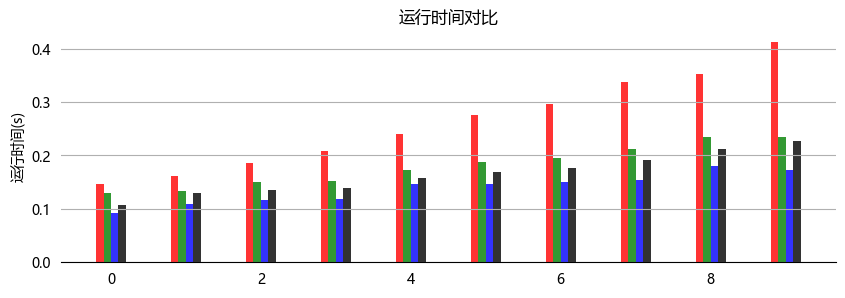

In [18]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcdefaults()
matplotlib.rcParams['font.sans-serif'] = ['MicroSoft YaHei']
x = [i for i in range(0, 10)] 
y = result
plt.figure(figsize=(10,3))
bar_width = 0.1

for i in range(len(y[0])):
    plt.bar(x=x[i] - bar_width*1.5, height=y[0][i], color='red', alpha=0.8, width=bar_width, label='1')
    plt.bar(x=x[i] - bar_width*0.5, height=y[1][i], color='green', alpha=0.8, width=bar_width, label='2')
    plt.bar(x=x[i] + bar_width*0.5, height=y[2][i], color='blue', alpha=0.8, width=bar_width, label='3')
    plt.bar(x=x[i] + bar_width*1.5, height=y[3][i], color='black', alpha=0.8, width=bar_width, label='4')
plt.title("运行时间对比")
plt.xlabel("")
plt.ylabel("运行时间(s)")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, axis='y')
ax.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

C-5.25 语句data.remove(value)仅仅删除Python的data列表中第一次出现的值为value的元素。实现remove_all(data, value)函数，使其能够在给出的列表中删除所有值为value的元素，对拥有n个元素的列表，该函数的最坏运行时间为O(n)。注意，并不是说重复调用remove方法不够高效。

In [19]:
def remove_all(data, value):
    keep = 0
    for walk in range(len(data)):
        if data[walk] != value:
            data[keep] = data[walk]
            keep += 1
    while len(data) > keep:
        data.pop()

C-5.26 设B为数组，其大小$n\geq 6$，包含1~n-5的整数，恰有5个重复元素。给出一个不错的算法，找出B中这5个重复的整数。

In [20]:
def find_all(data):
    found = [False] * len(data)
    result = []
    for val in data:
        if found[val]:
            result.append(val)
        else:
            found[val] = True
    return result

In [21]:
temp = [1, 2, 3, 4, 4, 4, 5, 5, 6, 7, 7, 8, 8, 9, 9, 10]
print(set(find_all(temp)))

{4, 5, 7, 8, 9}


In [ ]:
def find_all(data):
    sorted(data)
    result = []
    for i in range(1, len(data)):
        if data[i] == data[i-1]:
            result.append(data[i])
    return result

In [ ]:
temp = [1, 2, 3, 4, 4, 4, 5, 5, 6, 7, 7, 8, 8, 9, 9, 10]
print(set(find_all(temp)))

C-5.27 给出Python的L列表，该列表包含n个正整数，每个正整数用$\lceil \log(n) \rceil+1$位表示，给出一种运行时间为$O(n)$的方法，该方法发现k位的整数不在L中。

C-5.29 在数据库中，一种实用的操作为自然连接（natural join）。假如把数据库看作一张列表，该列表拥有许多有序的成对对象，比如(x, y)属于数据A，（y, z）属于数据库B，则A和B的自然连接即为所有有序三元组(x, y, z)所组成的列表。描述和分析一种高效算法，该算法能对包含n对对象的列表A和包含m对对象的列表B做自然连接。

In [ ]:
def natural_join(A, B):
    result = []
    for a1, a2 in A:
        for b1, b2 in B:
            if a2 == b1:
                result.append((a1, a2, b2))
    return result

In [ ]:
from random import choice
import string
def randomChar(y):
    # 返回随机字符串
    return ''.join(choice(string.ascii_letters) for _ in range(y))
randomChar(1)

In [ ]:
randomChar_1 = randomChar(50)
randomChar_2 = randomChar(50)
randomChar_3 = randomChar(50)
randomChar_4 = randomChar(50)
print(randomChar_1)
print(randomChar_2)
print(randomChar_3)
print(randomChar_4)

In [ ]:
A = [(randomChar_1[i], randomChar_2[i]) for i in range(50)]

In [ ]:
print(A)

In [ ]:
B = [(randomChar_3[i], randomChar_4[i]) for i in range(50)]

In [ ]:
print(B)

In [ ]:
print(natural_join(A, B))

C -5.30 当Bob想要通过互联网给Alice发送一则消息M时，他把M分解为n个数据包（data packet），并按顺序给这些包编号，然后将它们发送到网络中。当数据包到达Alice的计算机时，可能已经处于无序状态，因此，在确定自己获得整个消息前，Alice必须对n个包按序重组。假设Alice已知道n的值，为她描述一种有效方案去做这件事，这种算法的运行时间是多少？

In [22]:
def my_sort(data):
    for k in range(1, len(data)):
        cur = data[k]
        j = k
        while j > 0 and data[j-1] > cur:
            data[j] = data[j-1]
            j -= 1
        data[j] = cur

In [23]:
from random import shuffle
data = [i for i in range(100)]   # data
shuffle(data)                    # 打乱顺序
my_sort(data)                    # 重写排序
print(data)                      # 打印结果

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


C-5.31 给出一种方法，在$n\times n$数据集中，使用递归增加所有数，该数据集以列表的列表来表示。

In [24]:
c = 5
r = 5
data = [[0] * c for i in range(r)]
data

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [25]:
# 非递归形式
def add(data, gain):
    for i in range(len(data)):
        for j in range(len(data[i])):
            data[i][j] += gain
    return data

In [26]:
data = add(data, 1)
data

[[1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1]]

In [27]:
# 递归形式
def add(data, length, gain):
    if length == 1:
        for i in range(len(data[0])):
            data[0][i] += gain
    else:
        for i in range(len(data[length-1])):
            data[length-1][i] += gain
        add(data, length - 1, gain)

In [28]:
c = 5
r = 2

data = [[0] * c for i in range(r)]
data

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

In [29]:
add(data, len(data), 2)

In [ ]:
data

P-5.32 使用Python编写一个函数，该函数给出2个三维数值型数据集，并以离散方式将它们相加。

In [30]:
def add(A, B):
    assert len(A) == len(B)
    assert len(A[0]) == len(B[0])
    C = [[0]*len(A[0]) for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            C[i][j] = A[i][j] + B[i][j]
    return C

In [31]:
A = [[i]*5 for i in range(5)]
B = [[i]*5 for i in range(5)]

In [32]:
A

[[0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4]]

In [33]:
B

[[0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4]]

In [34]:
C = add(A, B)

In [35]:
C

[[0, 0, 0, 0, 0],
 [2, 2, 2, 2, 2],
 [4, 4, 4, 4, 4],
 [6, 6, 6, 6, 6],
 [8, 8, 8, 8, 8]]